In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the detaset
data= pd.read_csv(r'C:\Users\pande\OneDrive\Desktop\data analytics\sales_data_sample.csv', encoding="unicode escape")

In [3]:
#print(data.head(10))

This data is used for segmentation, customer analytics, clustering

We do initial analysis using SQlite database and perform query in-memory

In [4]:
data.shape

(2823, 25)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDER_NO          2823 non-null   int64  
 1   ORDER_QUANTITY    2823 non-null   int64  
 2   UNIT_PRICE        2823 non-null   float64
 3   LINE_NUMBER       2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDER_DATE        2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCT_LINE      2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [44]:
# data['TERRITORY'].fillna("NA", inplace=True)
# data['ADDRESSLINE2'].fillna("NA", inplace=True)
# data['STATE'].fillna("NA", inplace=True)
# data['POSTALCODE'].fillna("NA", inplace=True)

In [7]:
conn = sqlite3.connect(':memory:') #creates an in-memory DB with SQLite

In [8]:
data.to_sql('sales', conn, index=False) #loads data to database

2823

In [9]:
#execute SQL queries
query1 = "SELECT COUNT(*) AS total_sales FROM sales;"
query2= "SELECT PRODUCT_LINE, SUM(ORDER_QUANTITY) AS TOTAL_QUANTITY FROM sales GROUP BY PRODUCT_LINE ORDER BY TOTAL_QUANTITY DESC LIMIT 5;"


SELECT Product, SUM(Quantity) AS total_quantity: This selects the 'Product' column and the sum of 'Quantity' for each product. The result of this sum is aliased as 'total_quantity'.

FROM sales: This specifies the source table, which is 'sales'.

GROUP BY Product: This groups the results by 'Product', so you get the sum of quantities for each unique product.

ORDER BY total_quantity DESC: This arranges the results in descending order based on the total quantity, so the highest quantities appear first.

LIMIT 5: This restricts the output to only the top 5 products based on the total quantity sold.

In [10]:
total_sales= pd.read_sql_query(query1, conn)
popular_products=pd.read_sql_query(query2, conn)

In [11]:
print("Total Sales:")
print(total_sales)

print("\nPopular Products:")
print(popular_products)

Total Sales:
   total_sales
0         2823

Popular Products:
       PRODUCT_LINE  TOTAL_QUANTITY
0      Classic Cars           33992
1      Vintage Cars           21069
2       Motorcycles           11663
3  Trucks and Buses           10777
4            Planes           10727


In [12]:
#data.info()

In [13]:
columns=['PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'STATE', 'POSTALCODE']


In [14]:
data=data.drop(columns, axis=1)

In [15]:
data.columns

Index(['ORDER_NO', 'ORDER_QUANTITY', 'UNIT_PRICE', 'LINE_NUMBER', 'SALES',
       'ORDER_DATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCT_LINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'CITY', 'COUNTRY', 'TERRITORY',
       'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')

In [16]:
#data.info()

In [17]:
#we have 19 columns and 2823 rows 

In [18]:
cursor=conn.cursor() #object used to traverse and manage the results of the query execiuted on the db

In [19]:
cursor.execute('''
    SELECT
        PRODUCT_LINE,
        AVG(ORDER_QUANTITY) AS mean_quantity,
        MIN(ORDER_QUANTITY) AS min_quantity,
        MAX(ORDER_QUANTITY) AS max_quantity,
        SUM(ORDER_QUANTITY) AS total_quantity,
        AVG(SALES) AS avg_sales,
        MIN(SALES) AS min_sales,
        MAX(SALES) AS max_sales,
        SUM(SALES) AS total_sales
    FROM
        sales
    GROUP BY
        PRODUCT_LINE;
''')

results_step1= cursor.fetchall()

In [20]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch all the table names
table_names = cursor.fetchall()

# Display the table names
for name in table_names:
    print(name[0])  # The table name is the first element in the tuple

sales


In [21]:
cursor.execute('''
    SELECT
        PRODUCT_LINE,
        QTR_ID,
        AVG(ORDER_QUANTITY) AS mean_quantity,
        MIN(ORDER_QUANTITY) AS min_quantity,
        MAX(ORDER_QUANTITY) AS max_quantity,
        SUM(ORDER_QUANTITY) AS total_quantity        
    FROM
        sales
    GROUP BY
        PRODUCT_LINE,
        QTR_ID;
''')

results_step2= cursor.fetchall()

#create a table

cursor.execute('''
    CREATE TABLE IF NOT EXISTS ProductAggregates (
        PRODUCT_LINE TEXT,
        QTR_ID TEXT,
        MeanQuantity REAL,
        MinQuantity INTEGER,
        MaxQuantity INTEGER,
        TotalQuantity INTEGER        
    );
''')


In [22]:
#insert calculated results into the new table
cursor.executemany('''
    INSERT INTO ProductAggregates
    VALUES (?,?,?,?,?,?);
''', results_step2)

#commit changes
conn.commit()



In [23]:

cursor.execute('SELECT * FROM ProductAggregates')
rows=cursor.fetchall()
for row in rows:
    print (row)


('Classic Cars', '1', 35.87096774193548, 20, 50, 7784)
('Classic Cars', '2', 36.84, 10, 97, 6447)
('Classic Cars', '3', 33.82513661202186, 20, 50, 6190)
('Classic Cars', '4', 34.619897959183675, 20, 55, 13571)
('Motorcycles', '1', 35.14473684210526, 20, 50, 2671)
('Motorcycles', '2', 36.770270270270274, 20, 66, 2721)
('Motorcycles', '3', 34.59375, 20, 49, 2214)
('Motorcycles', '4', 34.675213675213676, 20, 55, 4057)
('Planes', '1', 36.458333333333336, 21, 50, 2625)
('Planes', '2', 34.6625, 11, 85, 2773)
('Planes', '3', 32.270833333333336, 20, 48, 1549)
('Planes', '4', 35.660377358490564, 20, 55, 3780)
('Ships', '1', 35.459016393442624, 22, 49, 2163)
('Ships', '2', 35.21739130434783, 21, 50, 1620)
('Ships', '3', 33.714285714285715, 20, 50, 1416)
('Ships', '4', 34.44705882352941, 20, 55, 2928)
('Trains', '1', 34.65, 20, 49, 693)
('Trains', '2', 36.583333333333336, 21, 51, 439)
('Trains', '3', 35.4, 22, 47, 531)
('Trains', '4', 34.96666666666667, 20, 50, 1049)
('Trucks and Buses', '1', 33.

In [24]:
query3= "SELECT * FROM ProductAggregates;"
data1=pd.read_sql_query(query3, conn)

In [25]:
mean_sales_per_product= data1.groupby('PRODUCT_LINE')['TotalQuantity'].mean()

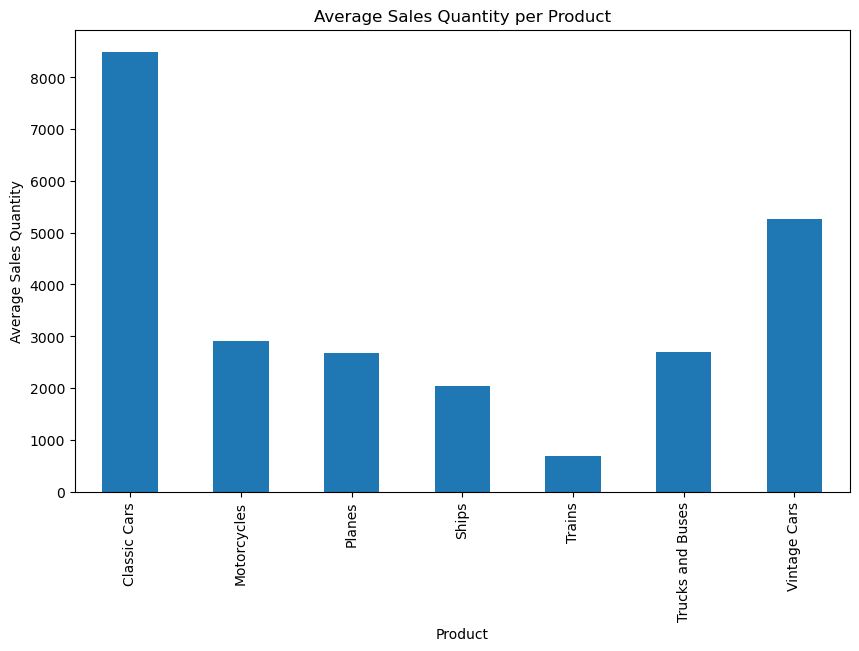

In [26]:
mean_sales_per_product.plot(kind='bar', figsize=(10,6), title='Average Sales Quantity per Product')
plt.xlabel('Product')
plt.ylabel('Average Sales Quantity')
plt.show()


    

In [27]:
cursor.execute('''
    SELECT
        PRODUCT_LINE,
        QTR_ID,
        AVG(SALES) AS avg_sales,
        MIN(SALES) AS min_sales,
        MAX(SALES) AS max_sales,
        SUM(SALES) AS total_sales
    FROM
        sales
    GROUP BY
        PRODUCT_LINE,
        QTR_ID;
''')

results_step3= cursor.fetchall()

In [28]:
cursor.execute('''
    CREATE TABLE IF NOT EXISTS SalesAggregates (
        PRODUCT_LINE TEXT,
        QTR_ID TEXT,
        MeanSalesRevenue REAL,
        MinSalesRevenue Real,
        MaxSalesRevenue Real,
        TotalSalesRevenue Real        
    );
''')

cursor.executemany('''
    INSERT INTO SalesAggregates
    VALUES (?,?,?,?,?,?);
''', results_step3)

#commit changes
conn.commit()

cursor.execute('SELECT * FROM SalesAggregates')
rows=cursor.fetchall()
for row in rows:
    print (row)

('Classic Cars', '1', 4056.5847926267293, 846.51, 8690.36, 880278.9000000003)
('Classic Cars', '2', 4380.678457142856, 640.05, 12001.0, 766618.7299999999)
('Classic Cars', '3', 4072.5052459016397, 717.4, 10993.5, 745268.4600000001)
('Classic Cars', '4', 3896.555025510201, 777.0, 11623.7, 1527449.569999999)
('Motorcycles', '1', 3478.7571052631574, 733.11, 9774.03, 264385.54)
('Motorcycles', '2', 3754.3549999999996, 651.8, 11886.6, 277822.26999999996)
('Motorcycles', '3', 3331.1671875, 981.2, 8339.8, 213194.7)
('Motorcycles', '4', 3512.6994017094007, 1035.58, 8892.9, 410985.8299999999)
('Planes', '1', 3254.9515277777773, 1364.25, 10066.6, 234356.50999999995)
('Planes', '2', 3088.184375, 875.91, 8160.3, 247054.74999999997)
('Planes', '3', 2980.269791666668, 948.99, 6724.0, 143052.95000000007)
('Planes', '4', 3306.9750943396207, 1063.65, 7483.98, 350539.3599999998)
('Ships', '1', 3342.250819672131, 1192.56, 6804.63, 203877.3)
('Ships', '2', 3111.179999999999, 1472.62, 6960.48, 143114.27999

In [29]:
query4= """
    SELECT pa.PRODUCT_LINE, 
    pa.QTR_ID, pa.MeanQuantity, 
    pa.MinQuantity, 
    pa.MaxQuantity, 
    pa.TotalQuantity, 
    sa.MeanSalesRevenue,  
    sa.MinSalesRevenue,  
    sa.MaxSalesRevenue,  
    sa.TotalSalesRevenue
    FROM ProductAggregates pa
    JOIN SalesAggregates sa ON pa.PRODUCT_LINE = sa.PRODUCT_LINE and pa.QTR_ID = sa.QTR_ID;
"""

data2= pd.read_sql_query(query4, conn)


print(data2)

        PRODUCT_LINE QTR_ID  MeanQuantity  MinQuantity  MaxQuantity  \
0       Classic Cars      1     35.870968           20           50   
1       Classic Cars      2     36.840000           10           97   
2       Classic Cars      3     33.825137           20           50   
3       Classic Cars      4     34.619898           20           55   
4        Motorcycles      1     35.144737           20           50   
5        Motorcycles      2     36.770270           20           66   
6        Motorcycles      3     34.593750           20           49   
7        Motorcycles      4     34.675214           20           55   
8             Planes      1     36.458333           21           50   
9             Planes      2     34.662500           11           85   
10            Planes      3     32.270833           20           48   
11            Planes      4     35.660377           20           55   
12             Ships      1     35.459016           22           49   
13    

In [30]:
#calculating quarterly sales revenue
QuarterlyRevenue=data2.groupby(['PRODUCT_LINE', 'QTR_ID'])['MeanSalesRevenue'].sum().unstack()

In [31]:
print(QuarterlyRevenue)

QTR_ID                      1            2            3            4
PRODUCT_LINE                                                        
Classic Cars      4056.584793  4380.678457  4072.505246  3896.555026
Motorcycles       3478.757105  3754.355000  3331.167188  3512.699402
Planes            3254.951528  3088.184375  2980.269792  3306.975094
Ships             3342.250820  3111.180000  2869.005238  2905.262706
Trains            2905.790000  2940.405833  2630.010667  3113.088000
Trucks and Buses  3364.823226  3822.832063  3627.472909  3957.201405
Vintage Cars      3192.258854  3039.522342  3103.492812  3154.913210


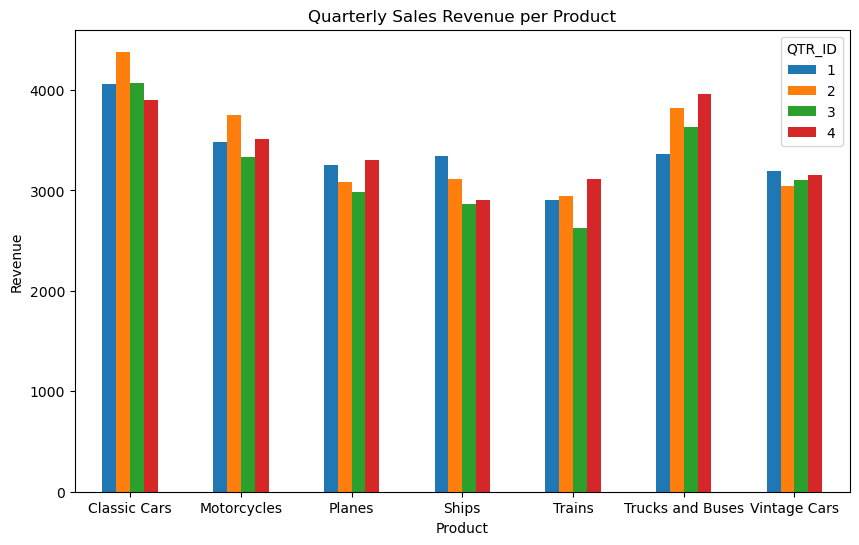

In [32]:
QuarterlyRevenue.plot(kind='bar', figsize=(10,6))
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.title('Quarterly Sales Revenue per Product')
plt.xticks(rotation=0)
plt.show()

In [33]:
QuarterlyRevenue['Revenue_Difference1']= QuarterlyRevenue['2']-QuarterlyRevenue['1']
QuarterlyRevenue['Revenue_Difference2']= QuarterlyRevenue['3']-QuarterlyRevenue['2']
QuarterlyRevenue['Revenue_Difference3']= QuarterlyRevenue['4']-QuarterlyRevenue['3']


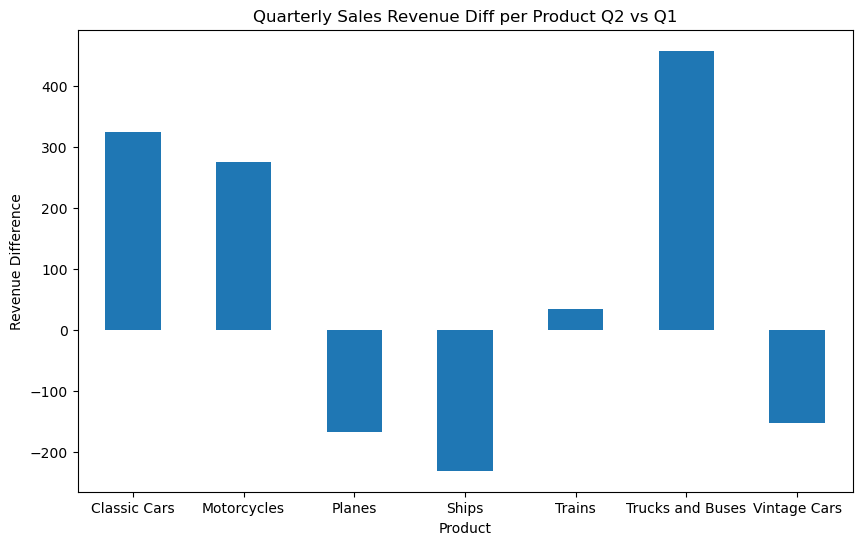

In [34]:
QuarterlyRevenue['Revenue_Difference1'].plot(kind='bar', figsize=(10,6))
plt.xlabel('Product')
plt.ylabel('Revenue Difference')
plt.title('Quarterly Sales Revenue Diff per Product Q2 vs Q1')
plt.xticks(rotation=0)
plt.show()

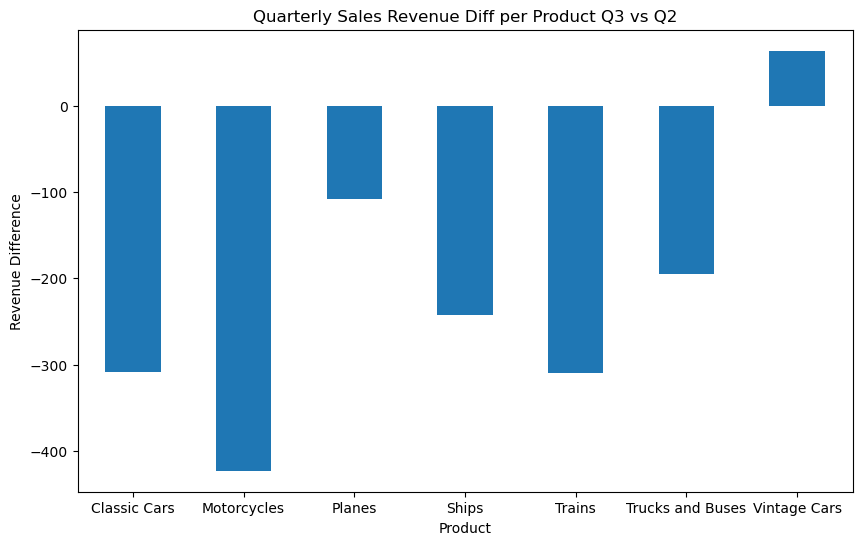

In [35]:
QuarterlyRevenue['Revenue_Difference2'].plot(kind='bar', figsize=(10,6))
plt.xlabel('Product')
plt.ylabel('Revenue Difference')
plt.title('Quarterly Sales Revenue Diff per Product Q3 vs Q2')
plt.xticks(rotation=0)
plt.show()

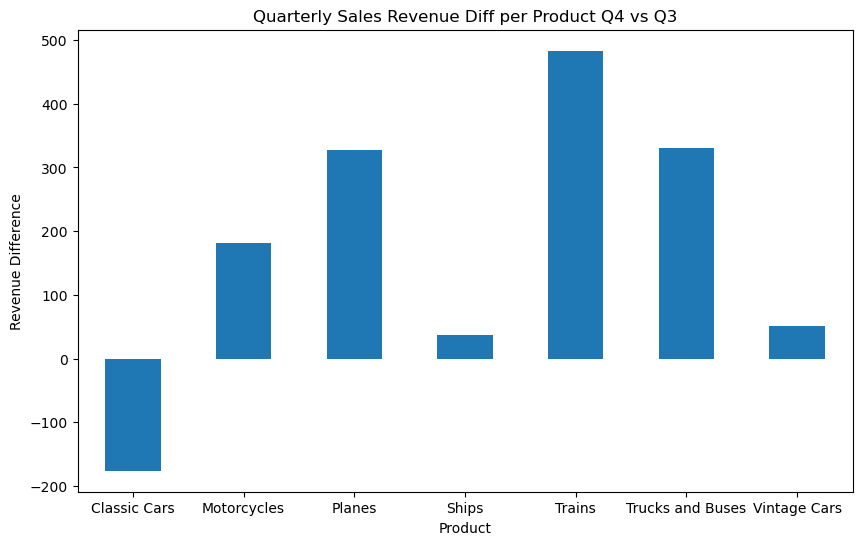

In [36]:
QuarterlyRevenue['Revenue_Difference3'].plot(kind='bar', figsize=(10,6))
plt.xlabel('Product')
plt.ylabel('Revenue Difference')
plt.title('Quarterly Sales Revenue Diff per Product Q4 vs Q3')
plt.xticks(rotation=0)
plt.show()

In [37]:
print(QuarterlyRevenue)

QTR_ID                      1            2            3            4  \
PRODUCT_LINE                                                           
Classic Cars      4056.584793  4380.678457  4072.505246  3896.555026   
Motorcycles       3478.757105  3754.355000  3331.167188  3512.699402   
Planes            3254.951528  3088.184375  2980.269792  3306.975094   
Ships             3342.250820  3111.180000  2869.005238  2905.262706   
Trains            2905.790000  2940.405833  2630.010667  3113.088000   
Trucks and Buses  3364.823226  3822.832063  3627.472909  3957.201405   
Vintage Cars      3192.258854  3039.522342  3103.492812  3154.913210   

QTR_ID            Revenue_Difference1  Revenue_Difference2  \
PRODUCT_LINE                                                 
Classic Cars               324.093665          -308.173211   
Motorcycles                275.597895          -423.187812   
Planes                    -166.767153          -107.914583   
Ships                     -231.070820    

In [38]:
data.columns

Index(['ORDER_NO', 'ORDER_QUANTITY', 'UNIT_PRICE', 'LINE_NUMBER', 'SALES',
       'ORDER_DATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCT_LINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'CITY', 'COUNTRY', 'TERRITORY',
       'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')

In [39]:
print(data[['ORDER_QUANTITY','MONTH_ID', 'YEAR_ID', 'PRODUCT_LINE','SALES', 'CITY', 'COUNTRY' ]])

      ORDER_QUANTITY  MONTH_ID  YEAR_ID PRODUCT_LINE    SALES           CITY  \
0                 30         2     2003  Motorcycles  2871.00            NYC   
1                 34         5     2003  Motorcycles  2765.90          Reims   
2                 41         7     2003  Motorcycles  3884.34          Paris   
3                 45         8     2003  Motorcycles  3746.70       Pasadena   
4                 49        10     2003  Motorcycles  5205.27  San Francisco   
...              ...       ...      ...          ...      ...            ...   
2818              20        12     2004        Ships  2244.40         Madrid   
2819              29         1     2005        Ships  3978.51           Oulu   
2820              43         3     2005        Ships  5417.57         Madrid   
2821              34         3     2005        Ships  2116.16       Toulouse   
2822              47         5     2005        Ships  3079.44         Boston   

      COUNTRY  
0         USA  
1      

In [40]:
df=pd.DataFrame(data[['ORDER_QUANTITY','MONTH_ID', 'YEAR_ID', 'PRODUCT_LINE','SALES', 'CITY', 'COUNTRY' ]])

In [41]:
print(df)

      ORDER_QUANTITY  MONTH_ID  YEAR_ID PRODUCT_LINE    SALES           CITY  \
0                 30         2     2003  Motorcycles  2871.00            NYC   
1                 34         5     2003  Motorcycles  2765.90          Reims   
2                 41         7     2003  Motorcycles  3884.34          Paris   
3                 45         8     2003  Motorcycles  3746.70       Pasadena   
4                 49        10     2003  Motorcycles  5205.27  San Francisco   
...              ...       ...      ...          ...      ...            ...   
2818              20        12     2004        Ships  2244.40         Madrid   
2819              29         1     2005        Ships  3978.51           Oulu   
2820              43         3     2005        Ships  5417.57         Madrid   
2821              34         3     2005        Ships  2116.16       Toulouse   
2822              47         5     2005        Ships  3079.44         Boston   

      COUNTRY  
0         USA  
1      

In [42]:
df['MONTH'] = df['MONTH_ID'].apply(lambda x : )

SyntaxError: invalid syntax (3629981357.py, line 1)